In [2]:
import numpy as np
import networkx as nx

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax):

    M = np.shape(E)[0]
    n = np.random.poisson(lam = Tmax*(N+b*M))
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    X = [2**i for i in range(N)][::-1]
    Espaitialmax = Espatial = np.ones(N)
    

    pmixing = False
    extinction = False

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)
            
            counts.increment(X[i], -1)

            X[i] = Espatial[i] = 0

            counts.increment(0, 1)

        else:

            i,j = E[np.random.randint(M)]
                    
            new = X[i] | X[j]
            counts.increment(X[i], -1)
            counts.increment(X[j], -1)
            counts.increment(new, 2)
            X[i] = X[j] = new
            Espatial[i] = Espatial[j] = new.bit_count()
            if new.bit_count() > Espaitialmax[i]:
                Espaitialmax[i] = new.bit_count()
            if new.bit_count() > Espaitialmax[j]:
                Espaitialmax[j] = new.bit_count()

        R[t] = len(counts) - (0 in counts)

        if (pmixing == False) and (R[t] == 1):
            pmixing = times[t]
            ## Average of the bitcounts of the rows AT C1 (not max over time!)
            e = np.average(Espatial)
        
        if pmixing != False:
            if (R[t] == 0) or (times[t] > 3 * pmixing):
                if R[t] == 0:
                    extinction = True
                times = times[:t]
                R = R[:t]
                ## Average of the bitcounts of the rows which are maxed over TIME 
                emax = np.average(Espaitialmax)
                break

    return times, R, counts.largest_non_zero, pmixing, e, emax, extinction 


N = 2000
d = 3
G = nx.random_regular_graph(d, N)
E = list(G.edges)
Tmax = 1e4
num_trials = 25

b = np.linspace(0.4678, 0.7017, 25)
s1starvar = []
s1starav = []
pmixinglist = []
es = []
emaxs = []
emaxvar = []
extinctionlist = []
for i in range(len(b)):
    s1 = []
    pm = []
    elist = []
    emaxlist = []
    for j in range(num_trials):
        times, R, spatial, pmixing, e, emax, extinction = find_tranformation_matrix(b[i], E, N, Tmax)
        s1.append(spatial)
        pm.append(pmixing)
        elist.append(e)
        emaxlist.append(emax)
        if extinction == False:
            extinctionlist.append(i)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    pmixinglist.append(np.mean(pm))
    es.append(np.mean(elist))
    emaxs.append(np.mean(emaxlist))
    emaxvar.append(np.var(emaxlist))
    print(f"b = {b[i]} done, pmixing = {pmixinglist[-1]}, s1star = {s1starav[-1]}, var = {s1starvar[-1]}")
    

print(s1starav)
print(s1starvar)
print(pmixinglist)
print(es)
print(emaxs)

b = 0.4678 done, pmixing = 37.179045783537745, s1star = 24.12, var = 24.5056
b = 0.47754583333333334 done, pmixing = 38.2011187011094, s1star = 26.08, var = 52.5536
b = 0.4872916666666667 done, pmixing = 45.719839024871646, s1star = 29.56, var = 58.246399999999994
b = 0.4970375 done, pmixing = 49.159090152305126, s1star = 32.88, var = 79.70559999999999
b = 0.5067833333333334 done, pmixing = 53.42679693374231, s1star = 33.08, var = 70.9536
b = 0.5165291666666667 done, pmixing = 59.97884256024037, s1star = 38.12, var = 210.34560000000002
b = 0.526275 done, pmixing = 86.49696436922248, s1star = 53.76, var = 286.26239999999996
b = 0.5360208333333334 done, pmixing = 93.83516015943724, s1star = 52.16, var = 288.05440000000004
b = 0.5457666666666666 done, pmixing = 117.19149154821623, s1star = 82.52, var = 522.2495999999999
b = 0.5555125 done, pmixing = 147.37658455854069, s1star = 148.88, var = 4730.5056
b = 0.5652583333333333 done, pmixing = 198.37781580017065, s1star = 254.76, var = 2162.5

In [5]:
pmixing = [37.179045783537745, 38.2011187011094, 45.719839024871646, 49.159090152305126, 53.42679693374231, 59.97884256024037, 86.49696436922248, 93.83516015943724, 117.19149154821623, 147.37658455854069, 198.37781580017065, 212.2065551234399, 195.10714557149382, 170.8667709334823, 152.06939956574925, 126.80868763096754, 120.53234107976743, 114.41760308871608, 110.33443889230603, 102.07561867868242, 93.92420089538942, 85.05700919646935, 79.85867073522108, 80.22587923889878, 73.78608363700612]
es = [0.021400000000000002, 0.02304, 0.03136, 0.04318, 0.04276, 0.06794000000000001, 0.13598000000000002, 0.21824000000000002, 0.5226599999999999, 1.9218800000000003, 8.44164, 16.45554, 25.637919999999998, 39.5963, 55.626599999999996, 71.16774, 83.73204, 99.1203, 122.76994, 137.76496, 163.23113999999998, 177.32118, 197.05712000000003, 216.29874, 232.23166]
emaxs = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00612, 1.2912199999999998, 6.392760000000001, 15.711459999999999, 29.348599999999998, 38.10652, 56.7011, 67.37098, 86.2818, 104.57632, 120.46651999999999, 137.66737999999998, 158.39028, 177.90310000000002, 191.00104, 207.93960000000004, 230.03648]
emaxvar = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008989056000000002, 4.856789081599999, 22.3630138624, 40.6556848184, 108.97250204, 72.4696066696, 68.5707002, 187.1899298296, 279.1161464, 188.3336756176, 246.9246799696, 155.46803316560002, 151.52959230159996, 350.86000828, 360.07486685839996, 397.0683704400001, 285.6502722096]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008989056000000002, 4.856789081599999, 22.3630138624, 40.6556848184, 108.97250204, 72.4696066696, 68.5707002, 187.1899298296, 279.1161464, 188.3336756176, 246.9246799696, 155.46803316560002, 151.52959230159996, 350.86000828, 360.07486685839996, 397.0683704400001, 285.6502722096]


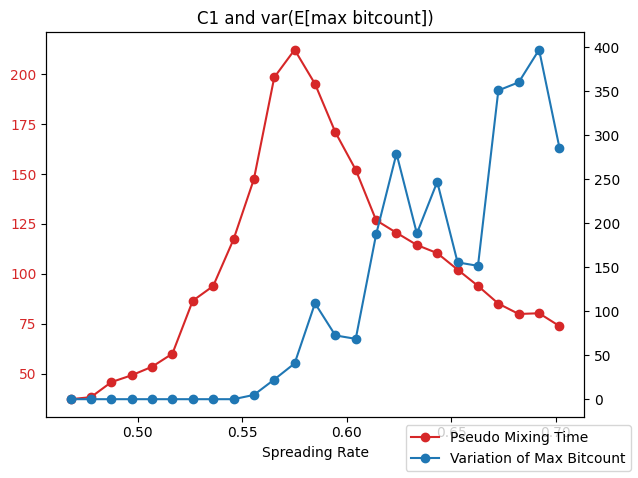

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pmixing, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
color = 'tab:blue'
ax2.plot(b, emaxvar, color=color, marker = 'o', label= 'Variation of Max Bitcount')
ax1.set_ylabel('', color=color)


fig.legend(loc = 'lower right')
plt.title('C1 and var(E[max bitcount])')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [4]:
print(extinctionlist)
print(b[extinctionlist[0]])

[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1

In [12]:
Bc = 0.5457666666666666 ## from extinction time 
# Bc = 0.5750041666666666 ## from C1 divergence 
b = np.linspace(0.4678, 0.7017, 25)
modelb = np.abs(b - Bc)

counter = 0
for i, j in zip(b, modelb):
    if i != Bc:
        counter += 1
    else:
        bnew = np.delete(b, counter)
        modelb = np.delete(modelb, counter)

temporalmodel = modelb**(-1)


print(temporalmodel)

[ 12.82599401  14.65827887  17.10132535  20.52159042  25.65198803
  34.20265071  51.30397606 102.60795212 102.60795212  51.30397606
  34.20265071  25.65198803  20.52159042  17.10132535  14.65827887
  12.82599401  11.40088357  10.26079521   9.32799565   8.55066268
   7.89291939   7.32913944   6.84053014   6.41299701]


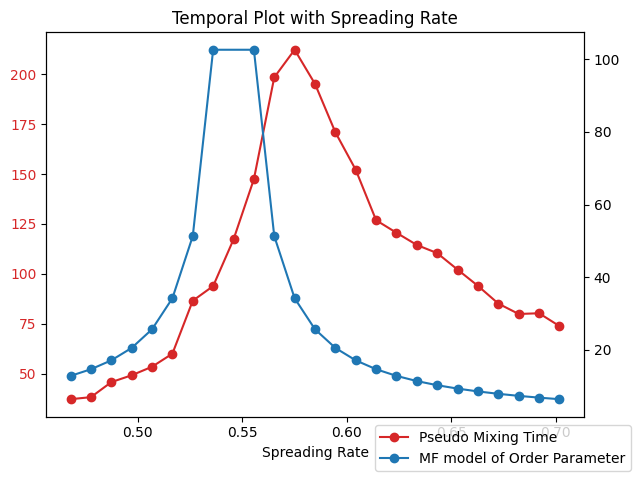

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pmixing, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
color = 'tab:blue'
ax2.plot(bnew, temporalmodel, color=color, marker = 'o', label= 'MF model of Order Parameter')
ax1.set_ylabel('', color=color)


fig.legend(loc = 'lower right')
plt.title('Temporal Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Bc from extinction time

In [42]:
Bc = 0.5457666666666666 ## from extinction time 
modelbnew = np.abs(b - Bc)
x = np.log(modelbnew[9:])
y = np.log(emaxs[9:])
ymodel = 1.8019376520301367 * x + 8.967234409957422
# Use np.polyfit to fit a line to the data
coefficients = np.polyfit(x, y, 1)

# The slope of the line is the first element of the coefficients
slope = coefficients[0]
print(slope)
print(coefficients[1])

1.8019376520301367
8.967234409957422


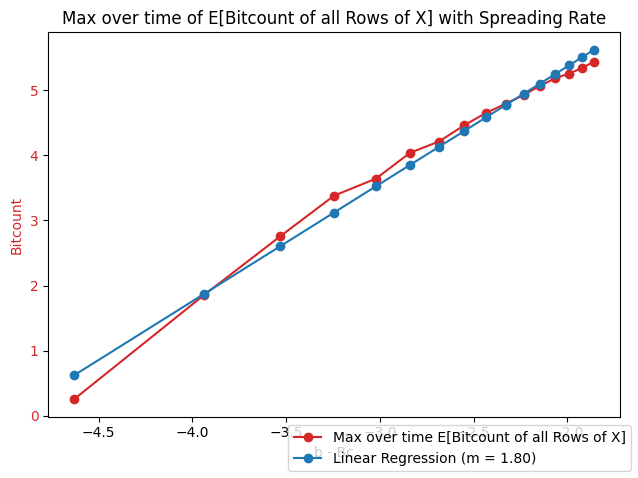

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('b - Bc')
ax1.set_ylabel('Bitcount', color=color)
ax1.plot(np.log(modelbnew[9:]), np.log(emaxs[9:]), color=color, marker = 'o', label= 'Max over time E[Bitcount of all Rows of X]')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:blue'
ax1.plot(x, ymodel, color=color, marker = 'o', label= 'Linear Regression (m = 1.80)')
ax1.plot()
fig.legend(loc = 'lower right')
plt.title('Max over time of E[Bitcount of all Rows of X] with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Bc from C1 divergence.

In [32]:
# Bc = 0.5457666666666666 ## from extinction time 
Bc = 0.5750041666666666 ## from C1 divergence 
b = np.linspace(0.4678, 0.7017, 25)
modelb = np.abs(b - Bc)

counter = 0
for i, j in zip(b, modelb):
    if i != Bc:
        counter += 1
    else:
        bnew = np.delete(b, counter)
        modelb = np.delete(modelb, counter)
        print(counter)

temporalmodel = modelb**(-1)

print(temporalmodel)

11
[  9.32799565  10.26079521  11.40088357  12.82599401  14.65827887
  17.10132535  20.52159042  25.65198803  34.20265071  51.30397606
 102.60795212 102.60795212  51.30397606  34.20265071  25.65198803
  20.52159042  17.10132535  14.65827887  12.82599401  11.40088357
  10.26079521   9.32799565   8.55066268   7.89291939]


In [36]:
modelbnew = np.abs(b - Bc)
x = np.log(modelbnew[12:])
y = np.log(emaxs[12:])
ymodel = 0.8548678743504495 * x + 7.119307879803078
# Use np.polyfit to fit a line to the data
coefficients = np.polyfit(x, y, 1)

# The slope of the line is the first element of the coefficients
slope = coefficients[0]
print(slope)
print(coefficients[1])

0.8548678743504495
7.119307879803078


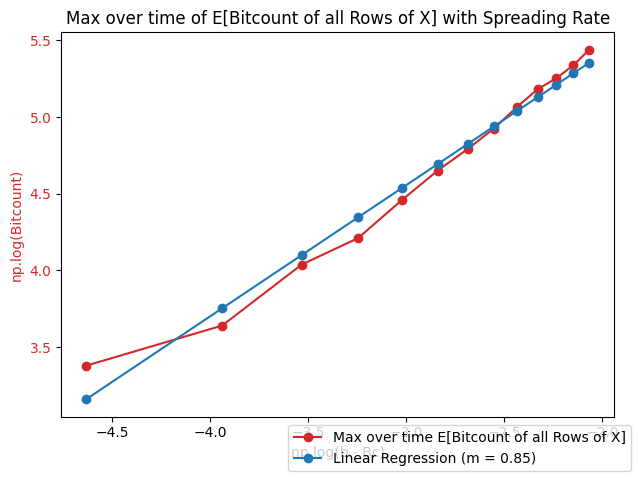

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('np.log(b - Bc)')
ax1.set_ylabel('np.log(Bitcount)', color=color)
ax1.plot(np.log(modelbnew[12:]), np.log(emaxs[12:]), color=color, marker = 'o', label= 'Max over time E[Bitcount of all Rows of X]')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:blue'
ax1.plot(x, ymodel, color=color, marker = 'o', label= 'Linear Regression (m = 0.85)')
ax1.plot()
fig.legend(loc = 'lower right')
plt.title('Max over time of E[Bitcount of all Rows of X] with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
